In [1]:
import pandas as pd
import seaborn as sns
import os

DATA_DIR = 'C:\\Users\\vncs_\\LT\\csv'

In [2]:
dfs = []
for file in os.listdir(DATA_DIR):
    filename = os.fsdecode(file)
    #Apenas os dados do estado de Sâo Paulo
    if filename.endswith(".csv") and filename.split(".")[0][2:-4] == 'SP':
        df = pd.read_csv(os.path.join(DATA_DIR, filename), index_col=None)
        dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True)

In [3]:
keep_columns = ['CNES', 'CODLEITO','QT_SUS','COMPETEN'] 
drop_columns = [column for column in list(df.columns) if column not in keep_columns]
df.drop(drop_columns, axis=1, inplace= True)
df['COMPETEN'] = df['COMPETEN'].apply(str) 
df['Mes'] = df['COMPETEN'].str[-2:]
df['Ano'] = df['COMPETEN'].str[:-2]


Para definir quais as UTI's que estão em uso foi utilizado a documentação do CNES dos códigos dos leitos.<br>
Os leitos 74,75,76 foram adicionados devido a [Portaria Nº 237, de 18 de Março de 2020](https://www.in.gov.br/web/dou/-/portaria-n-237-de-18-de-marco-de-2020-*-251908477)

In [4]:
icu_beds_type = [51,52,74,75,76,85,86]
df = df[df['CODLEITO'].isin(icu_beds_type)]
df.reset_index(inplace=True)
df =  df.pivot_table('QT_SUS',['CNES', 'COMPETEN','Mes','Ano'],'CODLEITO')
df.reset_index(inplace=True)
df.fillna(0)

In [8]:
df.describe()

CODLEITO,CNES,51,52,74,75,76,85,86
count,3.824800e+04,4851.000000,571.000000,14617.000000,20819.000000,4520.000000,1392.000000,455.000000
mean,3.153472e+06,12.392909,0.998249,0.684203,8.577069,19.531637,0.767241,2.676923
std,2.024255e+06,21.826151,3.239828,2.295558,9.290952,29.285394,2.157792,4.920403
min,8.028000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.079607e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.084414e+06,5.000000,0.000000,0.000000,8.000000,10.000000,0.000000,0.000000
75%,3.101126e+06,15.000000,0.000000,0.000000,10.000000,22.000000,0.000000,4.000000
max,9.997032e+06,222.000000,20.000000,18.000000,85.000000,128.000000,14.000000,14.000000


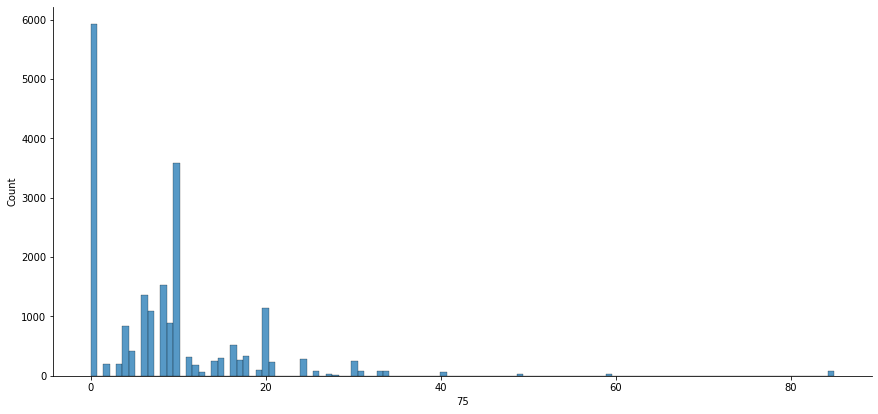

In [9]:
ax = sns.displot(df[75], kde=False)
ax.figure.set_size_inches(14,6)
ax